# Final proyect
## Felipe Riaño

#### Dependencias comunes

> pip install numpy pandas matplotlib seaborn scikit-learn xgboost



In [115]:
# Manejo de datos
import numpy as np
import pandas as pd
import scipy.stats as stats
import os
import pandas as pd
from datetime import datetime
import time

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px

# Preprocesamiento y modelos
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost
import xgboost as xgb

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Definir las rutas de los archivos
train_path = 'train.csv'
test_path = 'test.csv'

# Cargar los archivos CSV en DataFrames
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Mostrar las primeras filas de los DataFrames para verificar la carga
print("Train:")
display(train_df.head(5))

print("\nTest:")
display(test_df.head(5))

Train:


ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    Técnica o tecnológica incompleta   
1            Estrato 3                 No      Técnica o tecnológica completa   
2            Estrato 3                 Si  Secundaria (Bachillerato) completa   
3            Estrato 4                 Si                             No sabe   
4            Estrato 3                 Si                   Primaria completa   

  FAMI_TIENELAVADORA FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD  \
0                 Si                  Si                     N   
1                 Si                  No                     N   
2                 Si                  No                     N   
3                 Si                  No                     N   
4                 Si                  Si                     N   

  ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET.1  \
0                       No                   Si                   Si   
1                       No                   Si                   No   
2                       No                   No                   Si   
3                       No                   Si                   Si   
4                       No                   Si                   Si   

                  FAMI_EDUCACIONMADRE RENDIMIENTO_GLOBAL  
0                           Postgrado         medio-alto  
1    Técnica o tecnológica incompleta               bajo  
2  Secundaria (Bachillerato) completa               bajo  
3  Secundaria (Bachillerato) completa               alto  
4                   Primaria completa         medio-bajo


Test:


ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0  550236    20183                          TRABAJO SOCIAL   
1   98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2  499179    20212                  INGENIERIA MECATRONICA   
3  782980    20195                      CONTADURIA PUBLICA   
4  785185    20212              ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                BOLIVAR                          Menos de 500 mil   
1              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
3                  SUCRE    Entre 1 millón y menos de 2.5 millones   
4              ATLANTICO  Entre 2.5 millones y menos de 4 millones   

  ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0       Menos de 10 horas            Estrato 3                 Si   
1     Entre 21 y 30 horas            Estrato 2                 Si   
2                       0            Estrato 3                 Si   
3     Entre 21 y 30 horas            Estrato 1                 No   
4     Entre 11 y 20 horas            Estrato 2                 Si   

                    FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0        Técnica o tecnológica completa                 Si   
1    Secundaria (Bachillerato) completa                 Si   
2  Secundaria (Bachillerato) incompleta                 Si   
3                   Primaria incompleta                 Si   
4    Secundaria (Bachillerato) completa                 Si   

  FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                  No                     N                       Si   
1                  No                     N                       No   
2                  No                     N                       No   
3                  No                     N                       No   
4                  No                     N                       No   

  FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET.1  \
0                   Si                   Si   
1                   Si                   Si   
2                   Si                   Si   
3                   No                   No   
4                   Si                   Si   

                  FAMI_EDUCACIONMADRE  
0                   Primaria completa  
1      Técnica o tecnológica completa  
2  Secundaria (Bachillerato) completa  
3                 Primaria incompleta  
4  Secundaria (Bachillerato) completa

In [117]:
rendimiento_values = train_df['RENDIMIENTO_GLOBAL'].unique()
print("Valores únicos en la columna RENDIMIENTO_GLOBAL:", rendimiento_values)

Valores únicos en la columna RENDIMIENTO_GLOBAL: ['medio-alto' 'bajo' 'alto' 'medio-bajo']


In [118]:
# Eliminar la columna ID
train_df = train_df.drop(columns=['ID'])

In [119]:

are_equal = train_df['FAMI_TIENEINTERNET.1'].equals(train_df['FAMI_TIENEINTERNET'])
are_equal_test = test_df['FAMI_TIENEINTERNET.1'].equals(test_df['FAMI_TIENEINTERNET'])

print("Las columnas son iguales y tienen el mismo orden:", are_equal)
print("Las columnas son iguales y tienen el mismo orden are_equal_test:", are_equal_test)

if are_equal:
  train_df = train_df.drop(columns=['FAMI_TIENEINTERNET.1'])

if are_equal_test:
  test_df = test_df.drop(columns=['FAMI_TIENEINTERNET.1'])

Las columnas son iguales y tienen el mismo orden: True
Las columnas son iguales y tienen el mismo orden are_equal_test: True


# Relacion de columnas

### ESTU_PRGM_ACADEMICO
Interviene por su disparidad

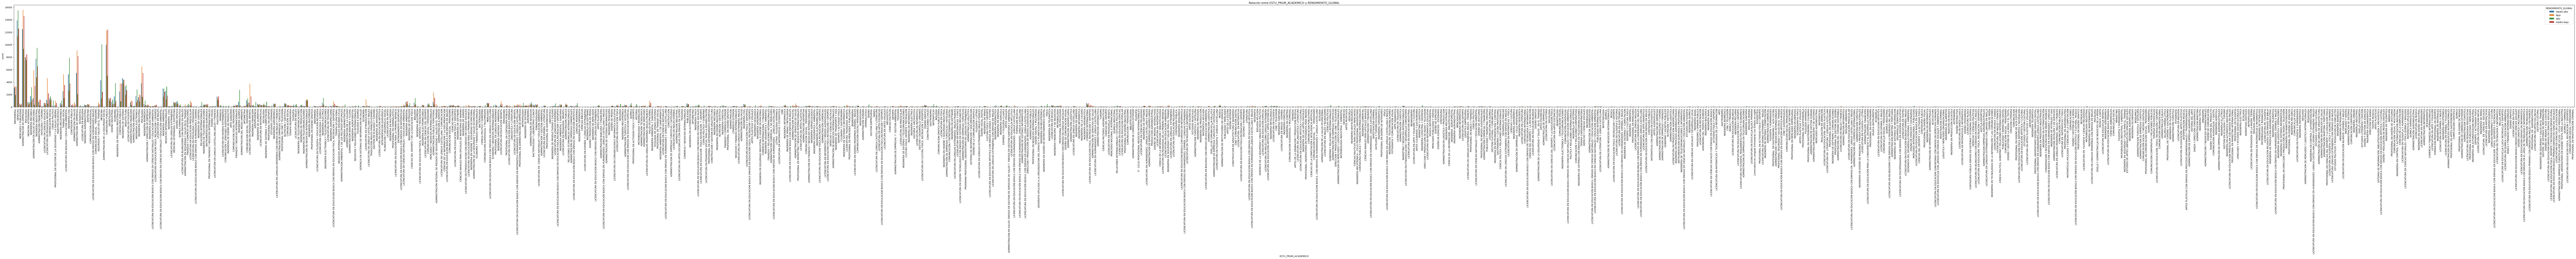

In [120]:
plt.figure(figsize=(200, 8))  # Ajustar el ancho de la imagen
sns.countplot(x='ESTU_PRGM_ACADEMICO', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre ESTU_PRGM_ACADEMICO y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## ESTU_PRGM_DEPARTAMENTO

Interviene por su disparidad

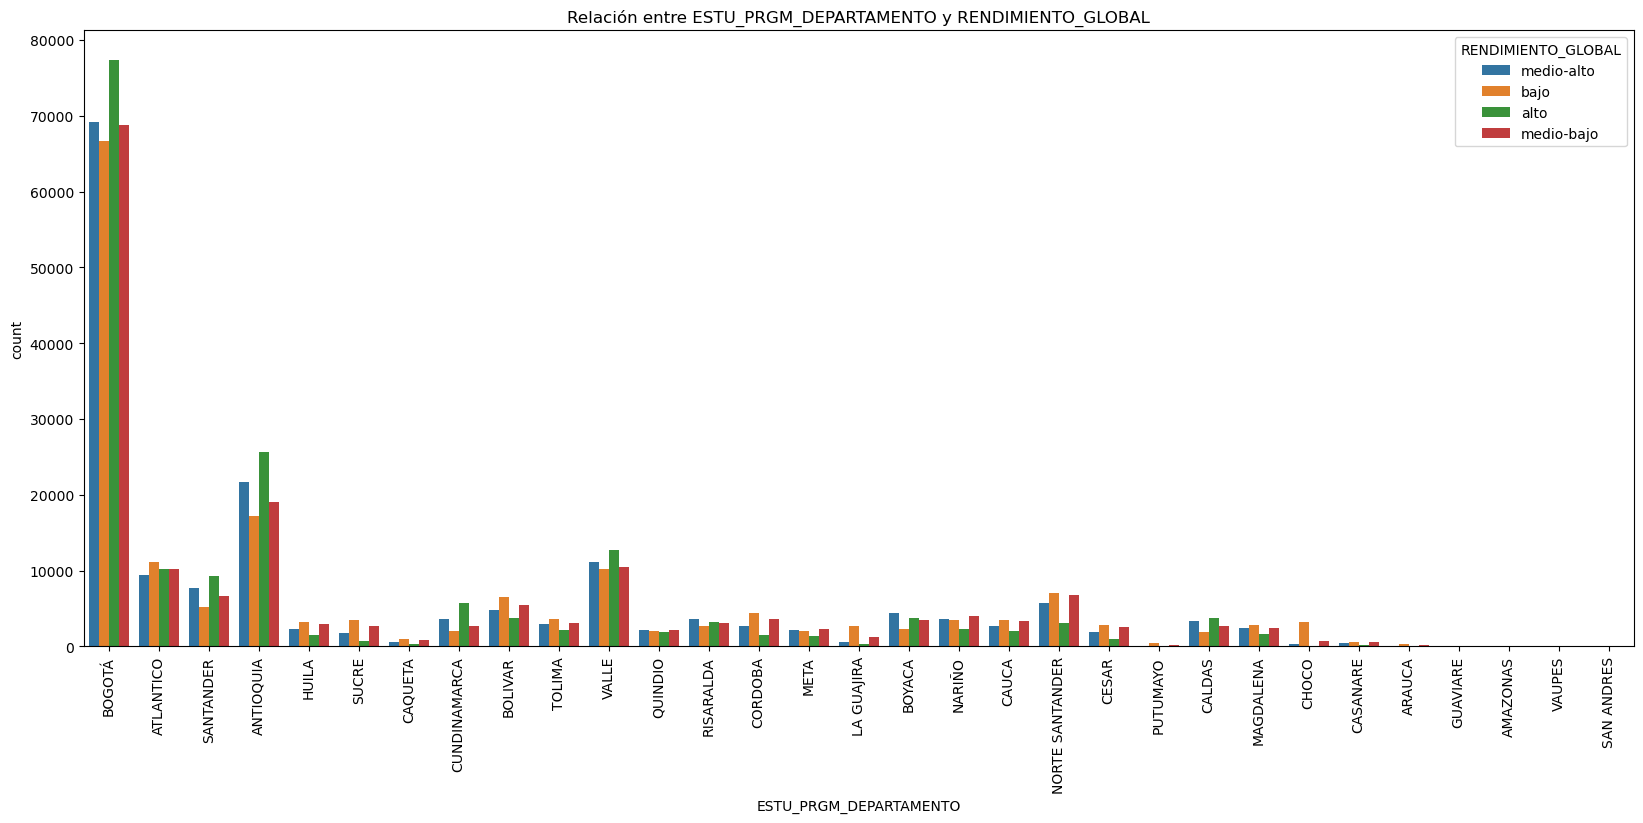

In [121]:
plt.figure(figsize=(20, 8))  # Ajustar el ancho de la imagen
sns.countplot(x='ESTU_PRGM_DEPARTAMENTO', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre ESTU_PRGM_DEPARTAMENTO y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## ESTU_VALORMATRICULAUNIVERSIDAD

Interviene por su disparidad

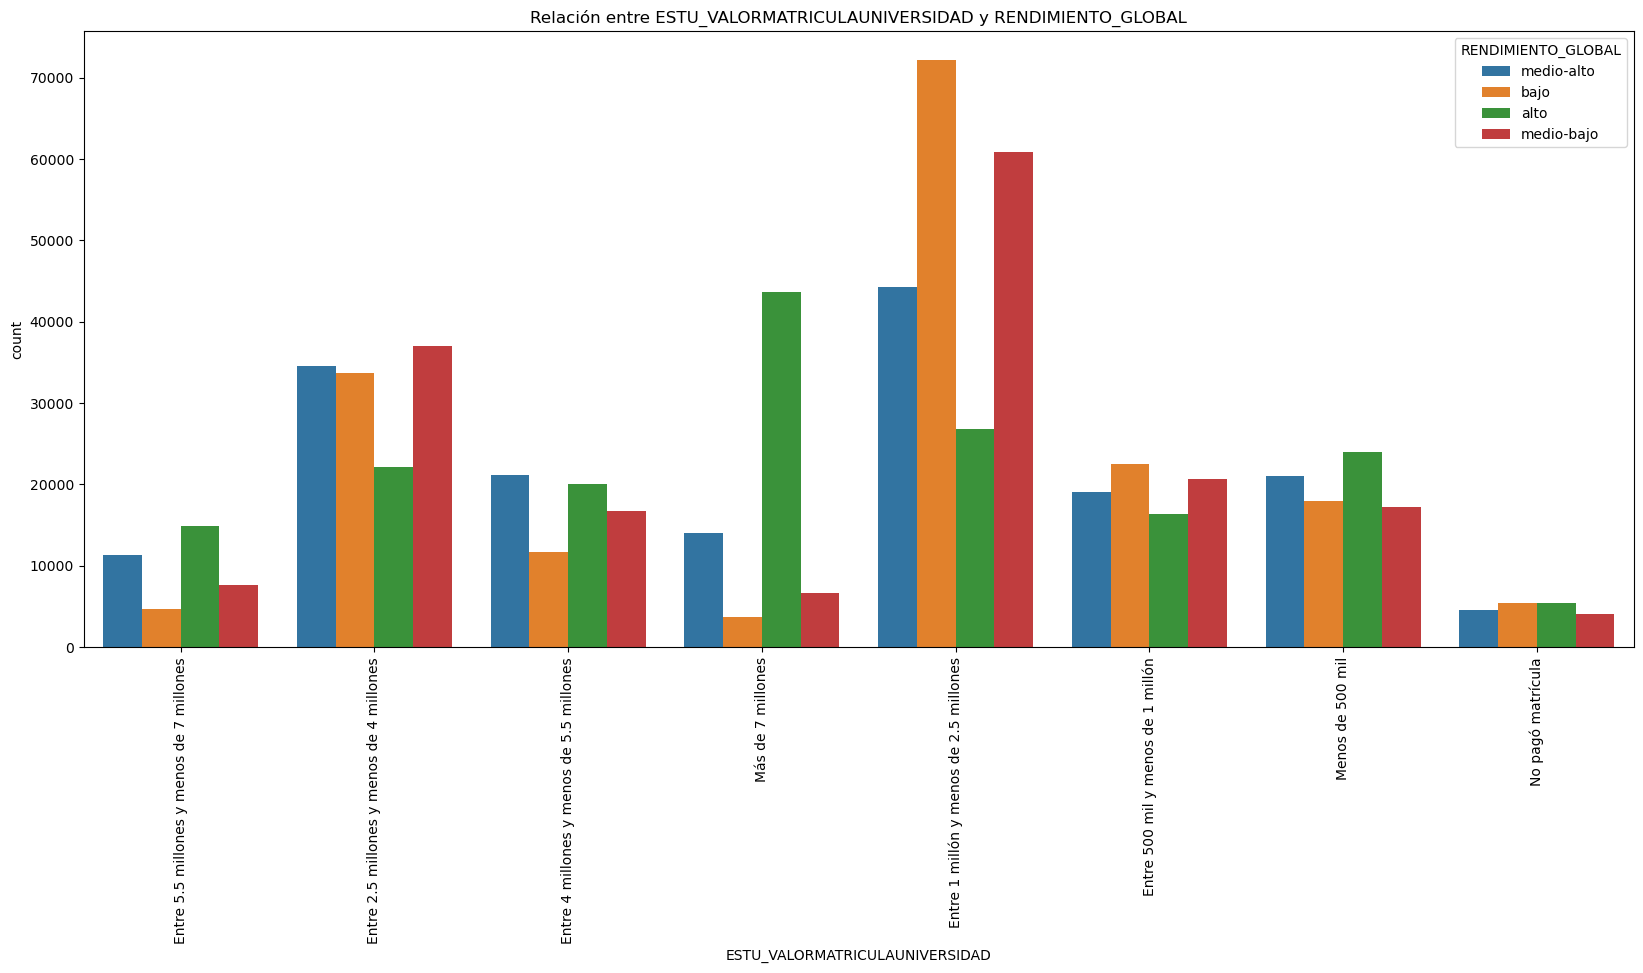

In [122]:
plt.figure(figsize=(20, 8))  # Ajustar el ancho de la imagen
sns.countplot(x='ESTU_VALORMATRICULAUNIVERSIDAD', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre ESTU_VALORMATRICULAUNIVERSIDAD y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## FAMI_ESTRATOVIVIENDA
interviene por su disparidad

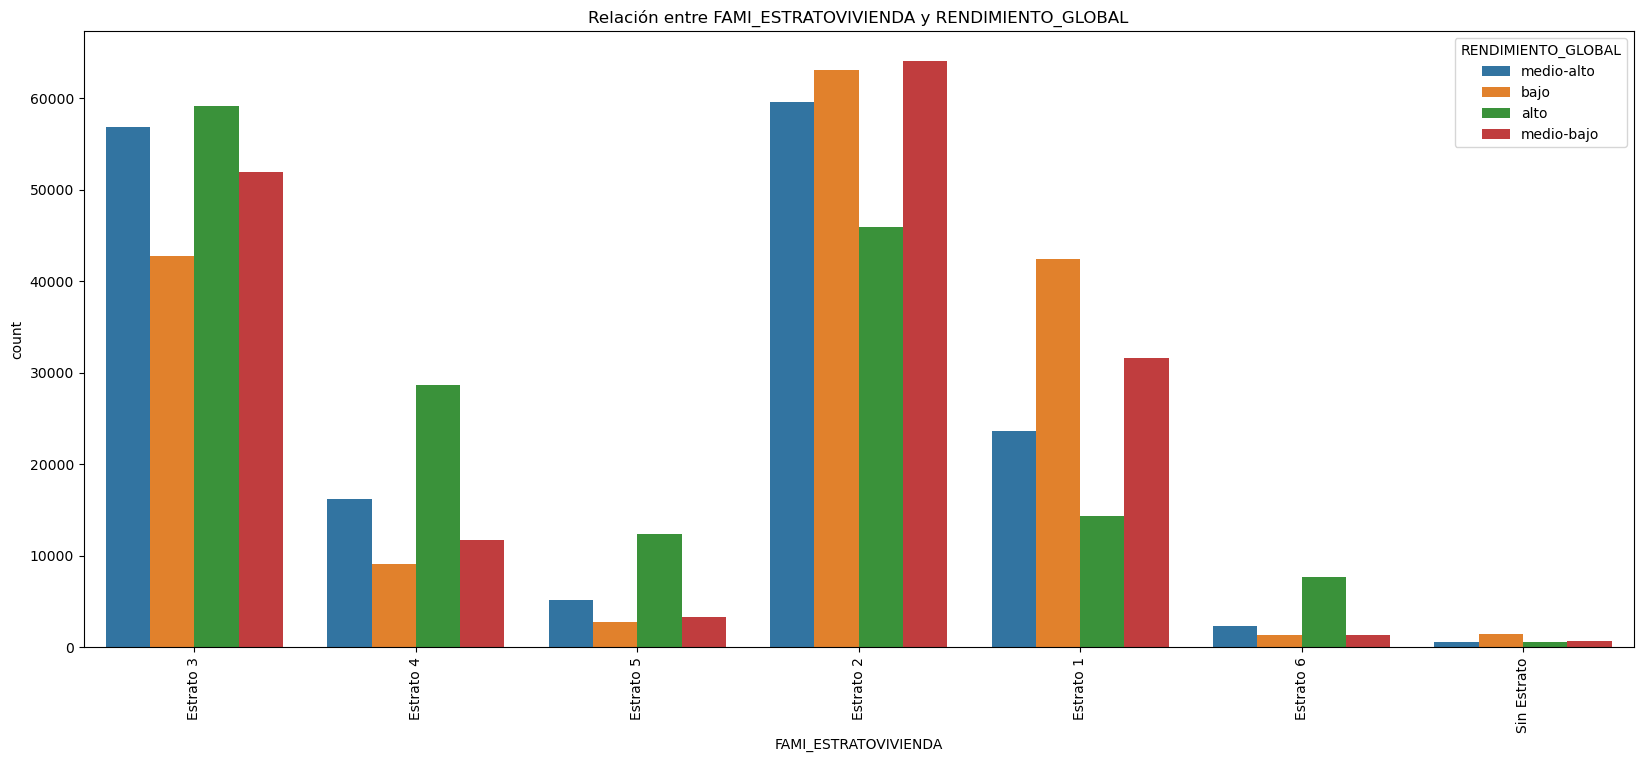

In [123]:
plt.figure(figsize=(20, 8))  # Ajustar el ancho de la imagen
sns.countplot(x='FAMI_ESTRATOVIVIENDA', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre FAMI_ESTRATOVIVIENDA y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## FAMI_EDUCACIONPADRE
interviene por su disparidad

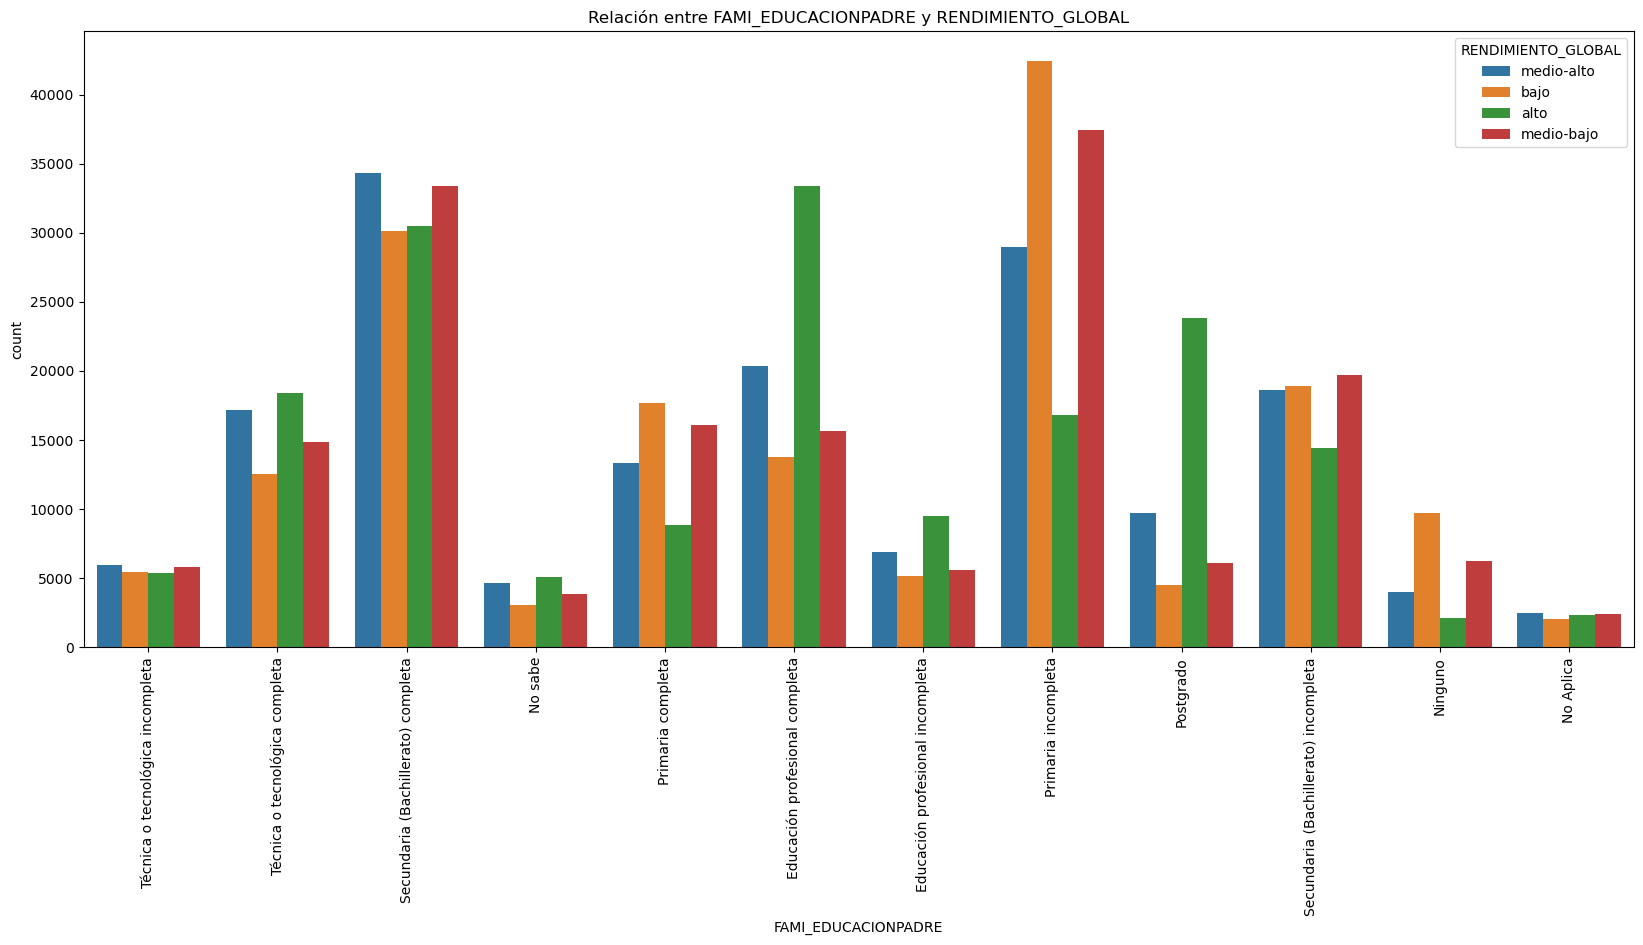

In [124]:
plt.figure(figsize=(20, 8))  # Ajustar el ancho de la imagen
sns.countplot(x='FAMI_EDUCACIONPADRE', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre FAMI_EDUCACIONPADRE y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()


## FAMI_EDUCACIONMADRE
interviene por su disparidad

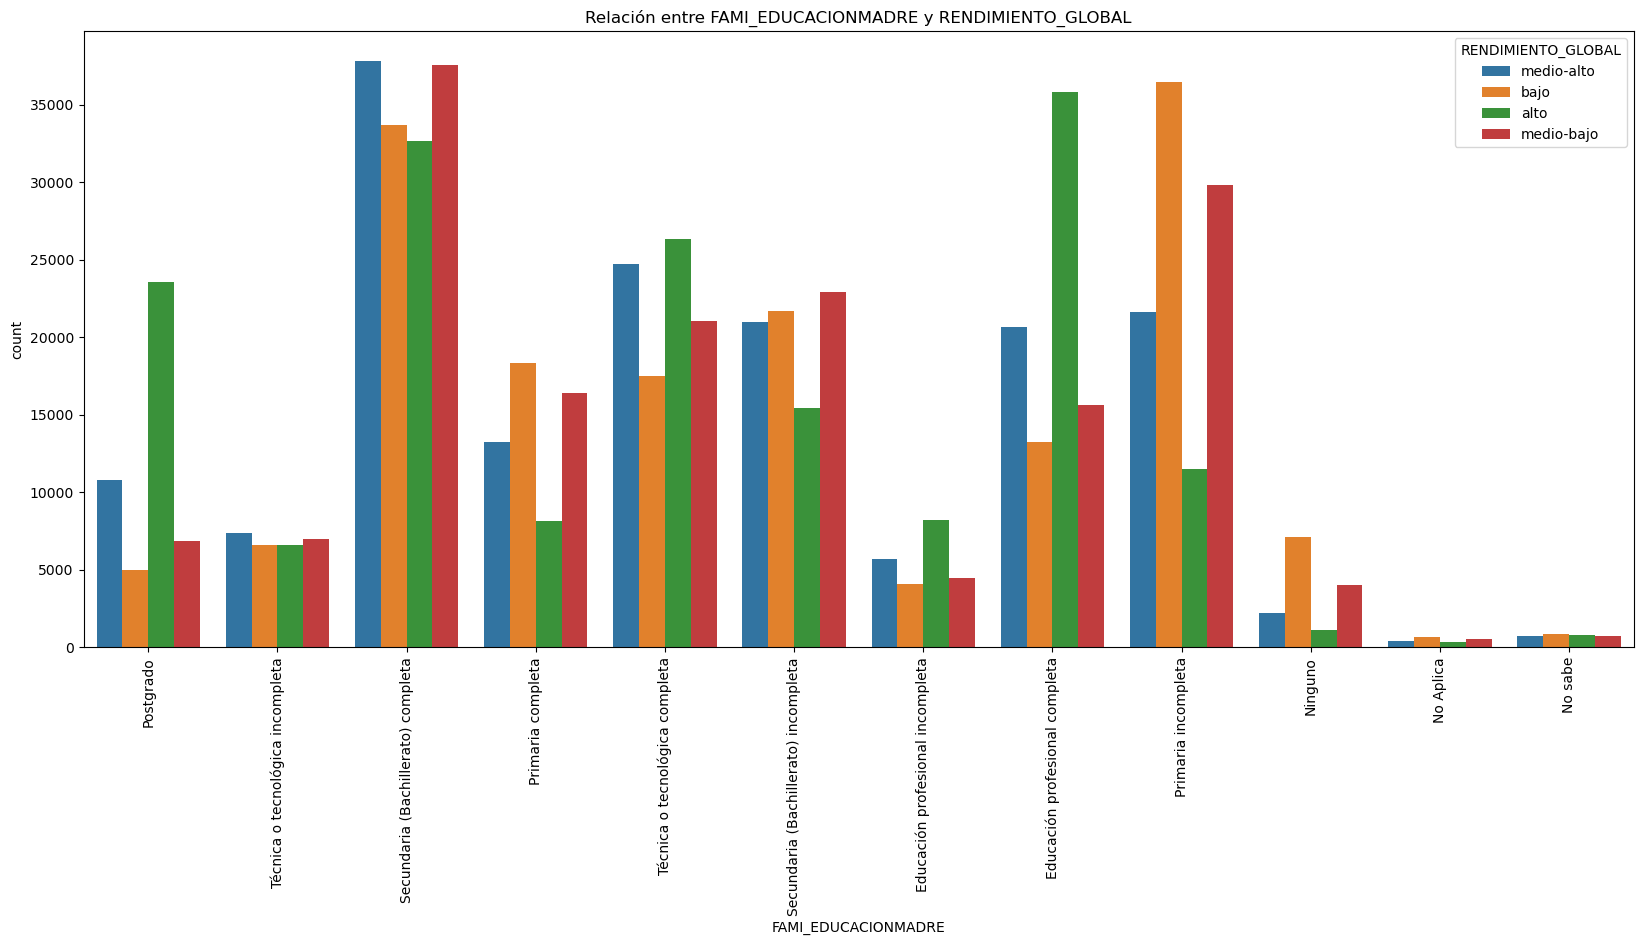

In [125]:
plt.figure(figsize=(20, 8))  # Ajustar el ancho de la imagen
sns.countplot(x='FAMI_EDUCACIONMADRE', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre FAMI_EDUCACIONMADRE y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()


## ESTU_HORASSEMANATRABAJA
interviene por su disparidad

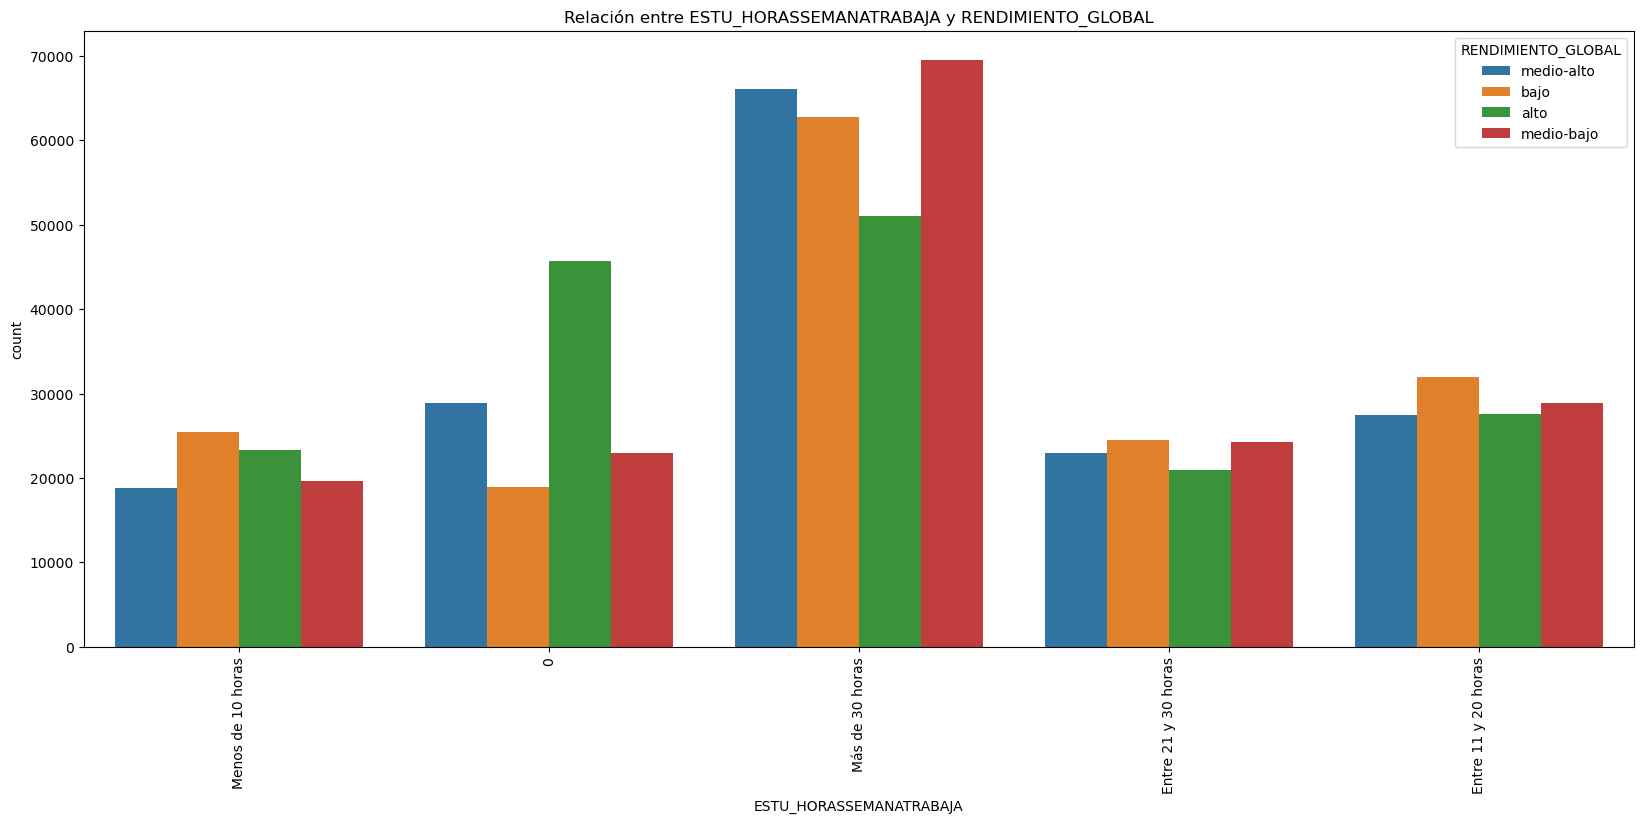

In [126]:
plt.figure(figsize=(20, 8))
sns.countplot(x='ESTU_HORASSEMANATRABAJA', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre ESTU_HORASSEMANATRABAJA y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## FAMI_TIENEINTERNET
interviene por su disparidad

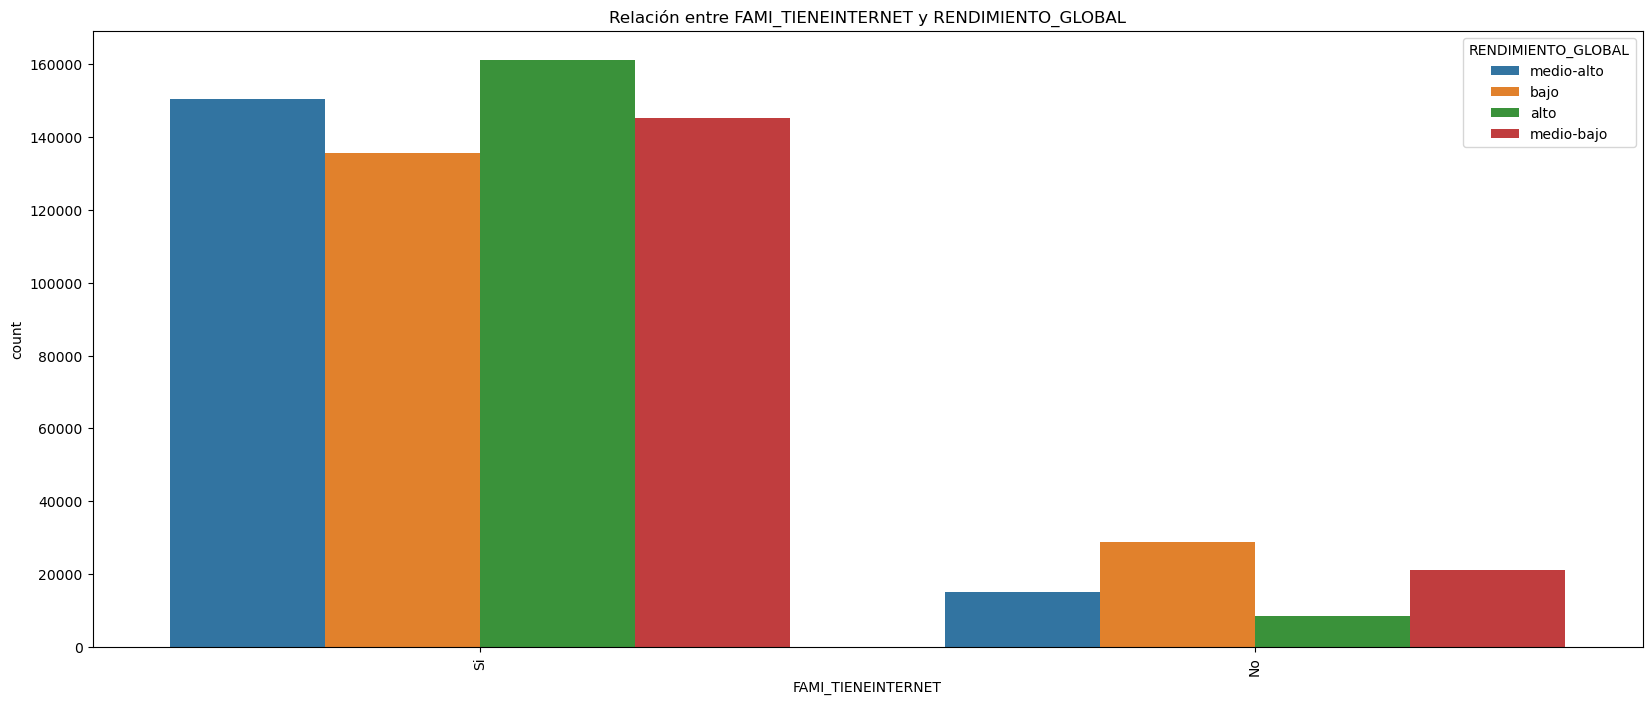

In [127]:
plt.figure(figsize=(20, 8))
sns.countplot(x='FAMI_TIENEINTERNET', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre FAMI_TIENEINTERNET y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## FAMI_TIENELAVADORA
interviene por su disparidad

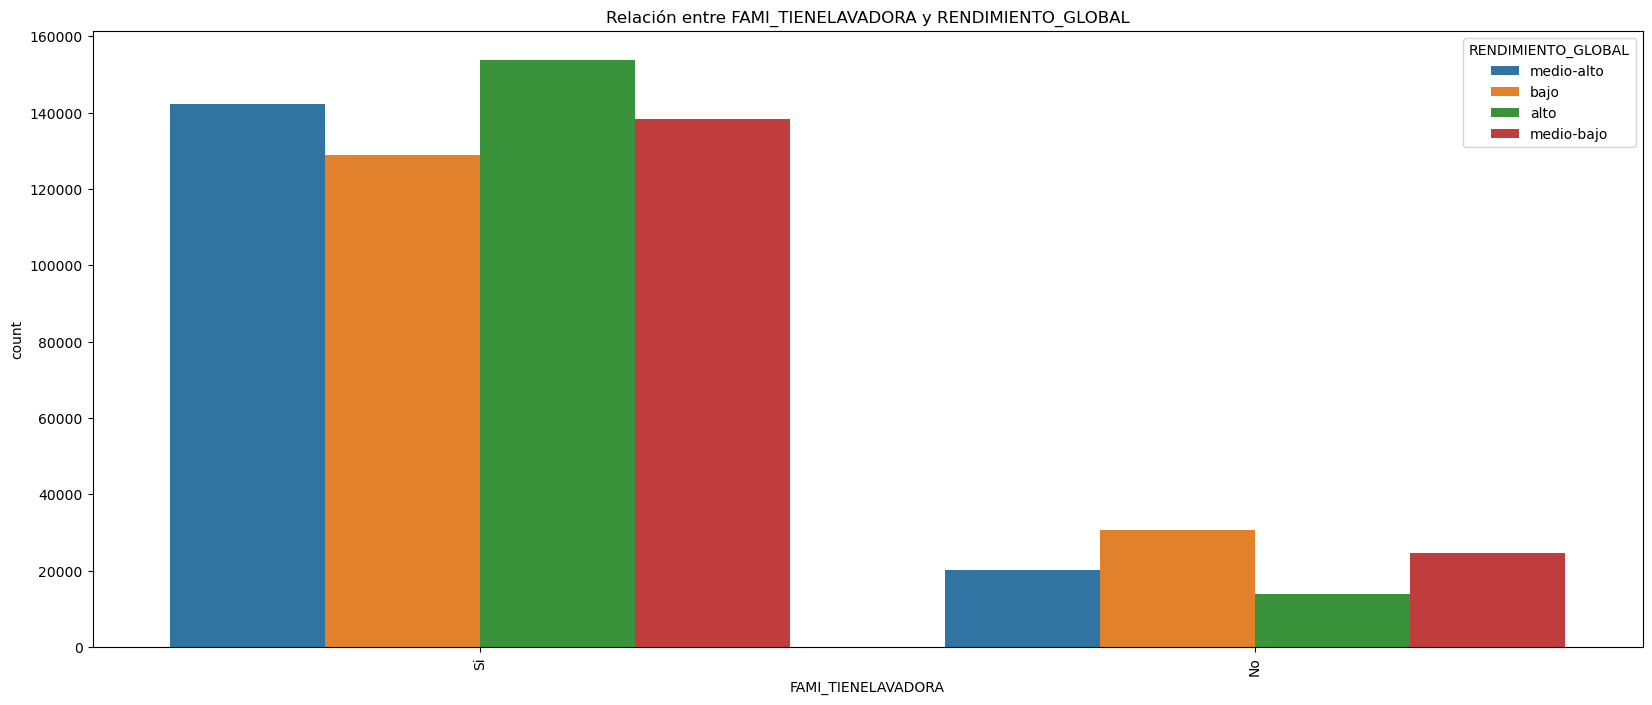

In [128]:
plt.figure(figsize=(20, 8))
sns.countplot(x='FAMI_TIENELAVADORA', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre FAMI_TIENELAVADORA y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## FAMI_TIENEAUTOMOVIL
p-valor es extremadamente bajo, interviene en el entrenamiento

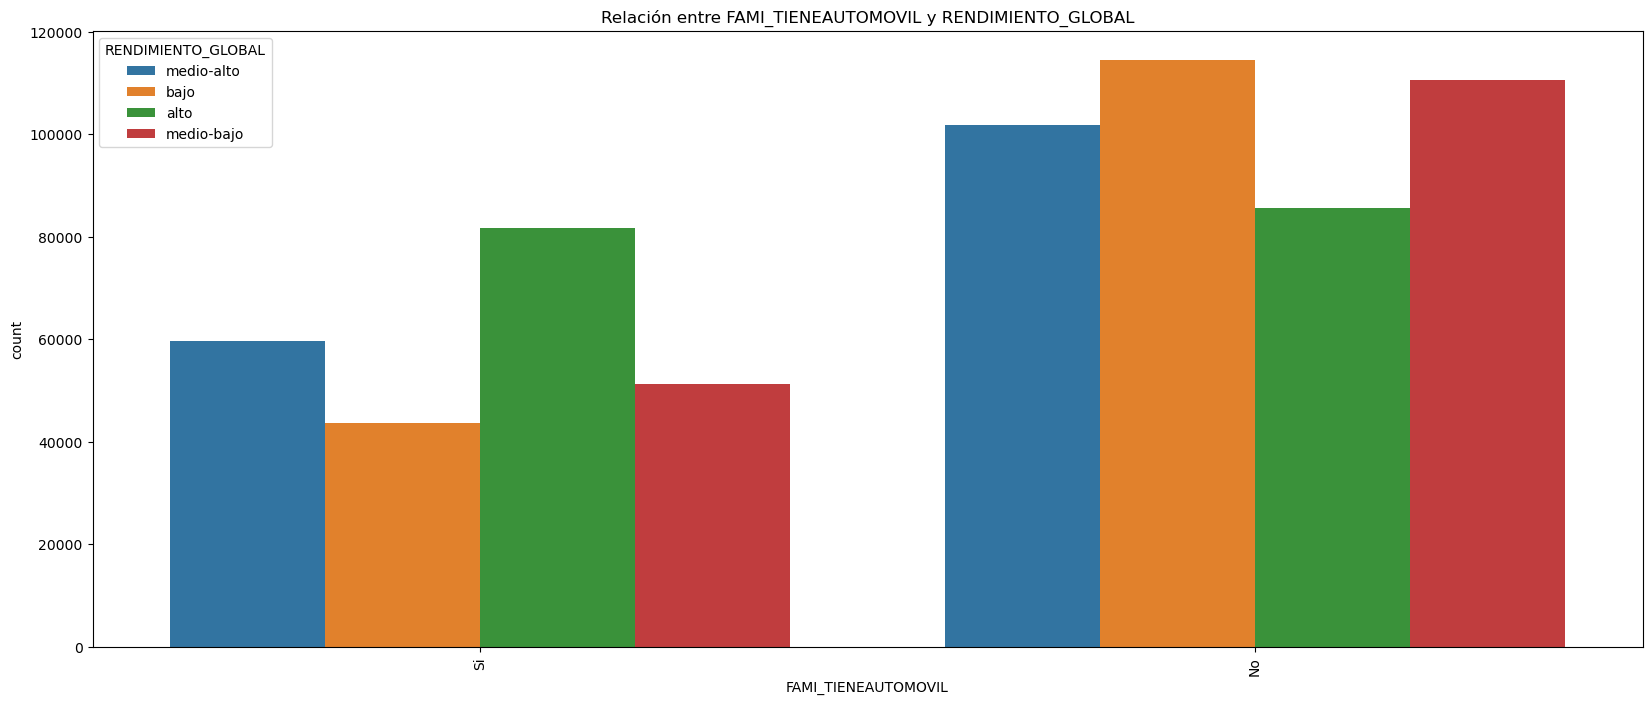

In [129]:
plt.figure(figsize=(20, 8))
sns.countplot(x='FAMI_TIENEAUTOMOVIL', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre FAMI_TIENEAUTOMOVIL y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

In [130]:
contingency_table = pd.crosstab(train_df['FAMI_TIENEAUTOMOVIL'], train_df['RENDIMIENTO_GLOBAL'])

print(contingency_table)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

alpha = 0.05
if p < alpha:
    print("La relación entre FAMI_TIENEAUTOMOVIL y RENDIMIENTO_GLOBAL es estadísticamente significativa.")
else:
    print("No se encontró una relación estadísticamente significativa entre FAMI_TIENEAUTOMOVIL y RENDIMIENTO_GLOBAL.")


RENDIMIENTO_GLOBAL    alto    bajo  medio-alto  medio-bajo
FAMI_TIENEAUTOMOVIL                                       
No                   85543  114464      101910      110689
Si                   81674   43634       59739       51224
Chi-cuadrado: 18078.642502470328
p-valor: 0.0
Grados de libertad: 3
Frecuencias esperadas:
[[106329.45458384 100530.89166052 102788.89110571 102956.76264993]
 [ 60887.54541616  57567.10833948  58860.10889429  58956.23735007]]
La relación entre FAMI_TIENEAUTOMOVIL y RENDIMIENTO_GLOBAL es estadísticamente significativa.


## ESTU_PRIVADO_LIBERTAD
No se incluye debido a su falta de variabilidad y la baja representatividad de la categoría S

In [131]:
# Verificar valores nulos
print("Nulos: ", train_df['ESTU_PRIVADO_LIBERTAD'].isnull().sum())

not_free_counts = train_df['ESTU_PRIVADO_LIBERTAD'].value_counts()
print("Cantidad por valores únicos en la columna ESTU_PRIVADO_LIBERTAD:")
print(not_free_counts)


contingency_table_no_free = pd.crosstab(train_df['ESTU_PRIVADO_LIBERTAD'], train_df['RENDIMIENTO_GLOBAL'])

print(contingency_table_no_free)

chi2_no_free, p_no_free, dof_no_free, expected_no_free = stats.chi2_contingency(contingency_table_no_free)

print(f"Chi-cuadrado: {chi2_no_free}")
print(f"p-valor: {p_no_free}")
print(f"Grados de libertad: {dof_no_free}")
print("Frecuencias esperadas:")
print(expected_no_free)

alpha = 0.05
if p_no_free < alpha:
    print("La relación entre ESTU_PRIVADO_LIBERTAD y RENDIMIENTO_GLOBAL es estadísticamente significativa.")
else:
    print("No se encontró una relación estadísticamente significativa entre ESTU_PRIVADO_LIBERTAD y RENDIMIENTO_GLOBAL.")

Nulos:  0
Cantidad por valores únicos en la columna ESTU_PRIVADO_LIBERTAD:
N    692466
S        34
Name: ESTU_PRIVADO_LIBERTAD, dtype: int64
RENDIMIENTO_GLOBAL       alto    bajo  medio-alto  medio-bajo
ESTU_PRIVADO_LIBERTAD                                        
N                      175613  172974      171613      172266
S                           6      13           6           9
Chi-cuadrado: 3.9224440042129554
p-valor: 0.26996147677352017
Grados de libertad: 3
Frecuencias esperadas:
[[1.75610378e+05 1.72978507e+05 1.71610574e+05 1.72266542e+05]
 [8.62244910e+00 8.49322455e+00 8.42605921e+00 8.45826715e+00]]
No se encontró una relación estadísticamente significativa entre ESTU_PRIVADO_LIBERTAD y RENDIMIENTO_GLOBAL.


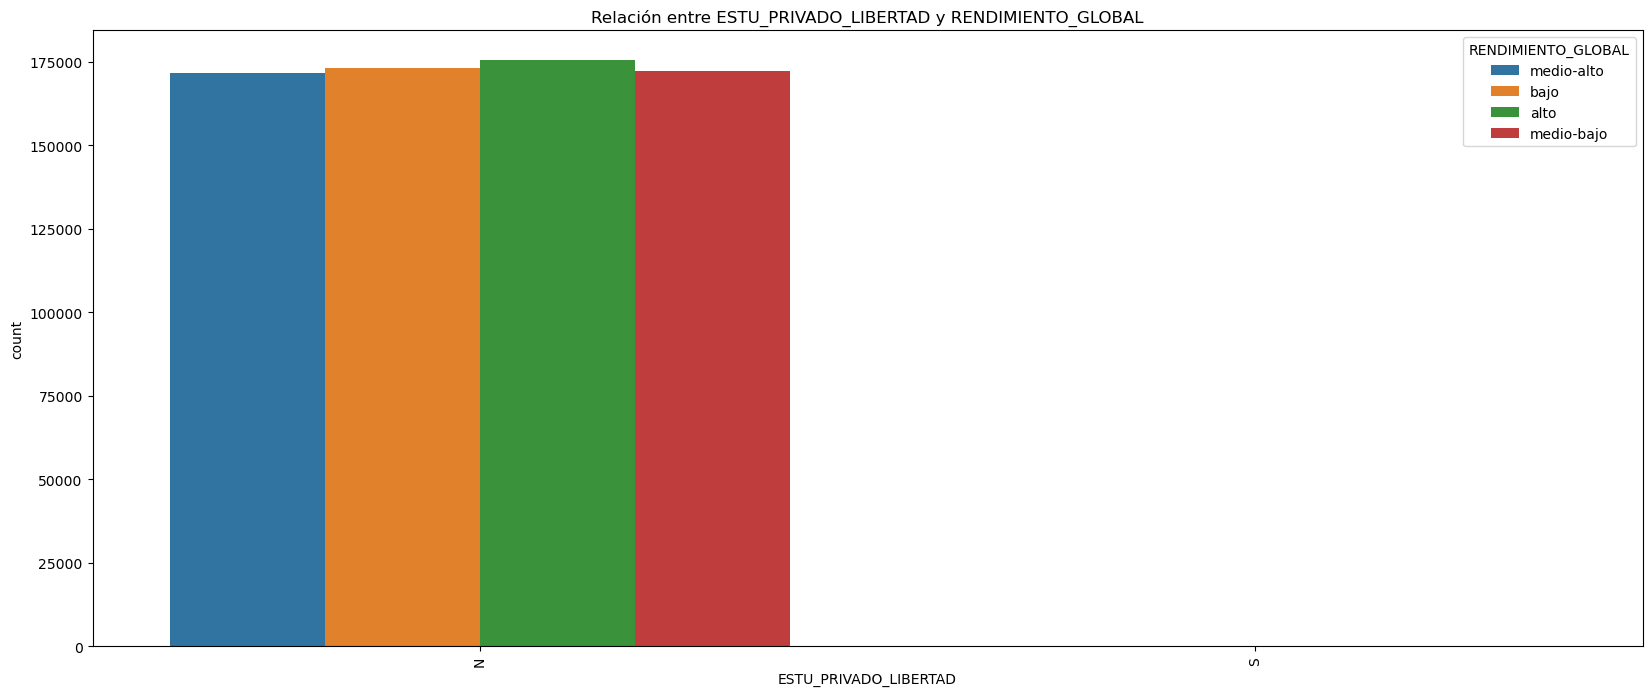

In [132]:
plt.figure(figsize=(20, 8))
sns.countplot(x='ESTU_PRIVADO_LIBERTAD', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre ESTU_PRIVADO_LIBERTAD y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## ESTU_PAGOMATRICULAPROPIO
Interviene en el entremnamiento

In [133]:
contingency_table_pago_propio = pd.crosstab(train_df['ESTU_PAGOMATRICULAPROPIO'], train_df['RENDIMIENTO_GLOBAL'])

print(contingency_table_pago_propio)

chi2_pago_propio, p_pago_propio, dof_pago_propio, expected_pago_propio = stats.chi2_contingency(contingency_table_pago_propio)

print(f"Chi-cuadrado: {chi2_pago_propio}")
print(f"p-valor: {p_pago_propio}")
print(f"Grados de libertad: {dof_pago_propio}")
print("Frecuencias esperadas:")
print(expected_pago_propio)

alpha = 0.05
if p_pago_propio < alpha:
    print("La relación entre ESTU_PAGOMATRICULAPROPIO y RENDIMIENTO_GLOBAL es estadísticamente significativa.")
else:
    print("No se encontró una relación estadísticamente significativa entre ESTU_PAGOMATRICULAPROPIO y RENDIMIENTO_GLOBAL.")

RENDIMIENTO_GLOBAL          alto   bajo  medio-alto  medio-bajo
ESTU_PAGOMATRICULAPROPIO                                       
No                        123072  76324       97507       85298
Si                         50215  95386       72571       85629
Chi-cuadrado: 27808.078290616344
p-valor: 0.0
Grados de libertad: 3
Frecuencias esperadas:
[[96545.58541666 95666.97139367 94757.7145227  95230.72866697]
 [76741.41458334 76043.02860633 75320.2854773  75696.27133303]]
La relación entre ESTU_PAGOMATRICULAPROPIO y RENDIMIENTO_GLOBAL es estadísticamente significativa.


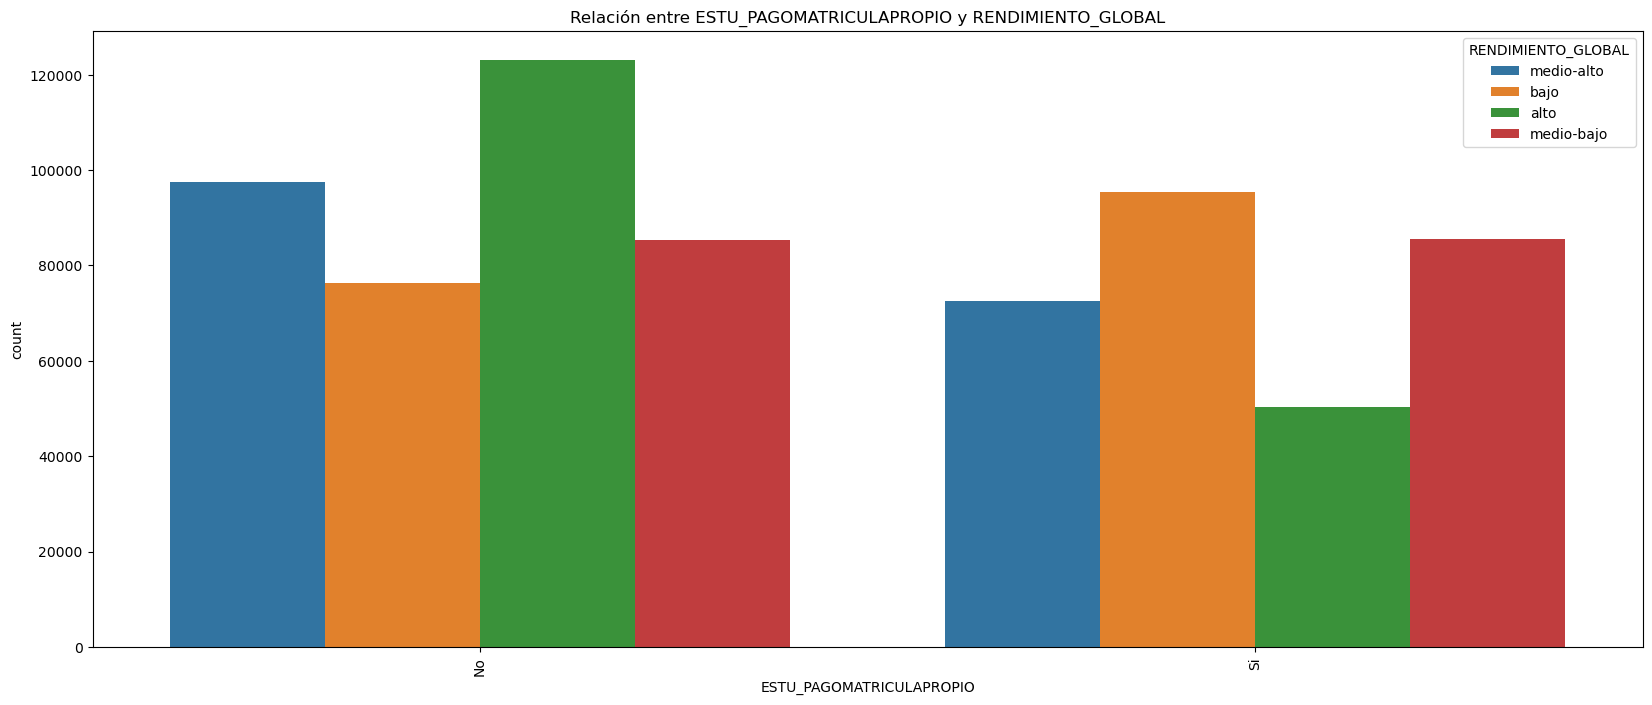

In [134]:
plt.figure(figsize=(20, 8))
sns.countplot(x='ESTU_PAGOMATRICULAPROPIO', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre ESTU_PAGOMATRICULAPROPIO y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## FAMI_TIENECOMPUTADOR
Se debe incluir

In [135]:
contingency_table_pc = pd.crosstab(train_df['FAMI_TIENECOMPUTADOR'], train_df['RENDIMIENTO_GLOBAL'])

print(contingency_table_pc)

chi2_pc , p_pc , dof_pc , expected_pc = stats.chi2_contingency(contingency_table_pc)

print(f"Chi-cuadrado: {chi2_pc}")
print(f"p-valor: {p_pc}")
print(f"Grados de libertad: {dof_pc}")
print("Frecuencias esperadas:")
print(expected_pc)

alpha = 0.05
if p_pc < alpha:
    print("La relación entre FAMI_TIENECOMPUTADOR y RENDIMIENTO_GLOBAL es estadísticamente significativa.")
else:
    print("No se encontró una relación estadísticamente significativa entre FAMI_TIENECOMPUTADOR y RENDIMIENTO_GLOBAL.")

RENDIMIENTO_GLOBAL      alto    bajo  medio-alto  medio-bajo
FAMI_TIENECOMPUTADOR                                        
No                      6072   23128       11321       16206
Si                    161884  137066      151493      147227
Chi-cuadrado: 13077.454272563371
p-valor: 0.0
Grados de libertad: 3
Frecuencias esperadas:
[[ 14559.41884208  13886.56280209  14113.67988851  14167.33846732]
 [153396.58115792 146307.43719791 148700.32011149 149265.66153268]]
La relación entre FAMI_TIENECOMPUTADOR y RENDIMIENTO_GLOBAL es estadísticamente significativa.


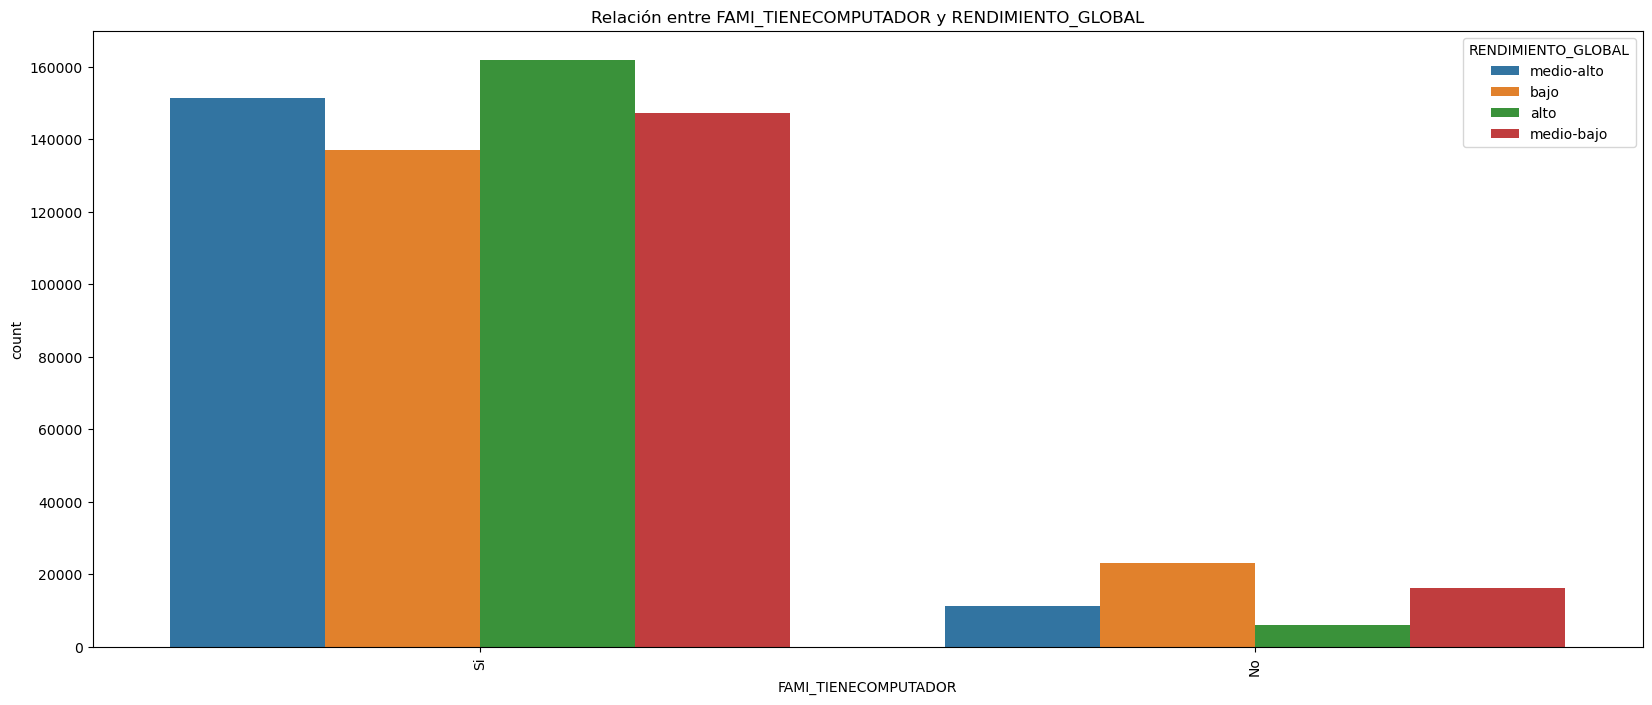

In [136]:
plt.figure(figsize=(20, 8))
sns.countplot(x='FAMI_TIENECOMPUTADOR', hue='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre FAMI_TIENECOMPUTADOR y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=90)
plt.legend(title='RENDIMIENTO_GLOBAL')
plt.show()

## PERIODO
Puede tener o no intervencion, habria que probar

Valores únicos en la columna RENDIMIENTO_GLOBAL: [20212 20203 20195 20183 20194 20213 20184 20202 20196]


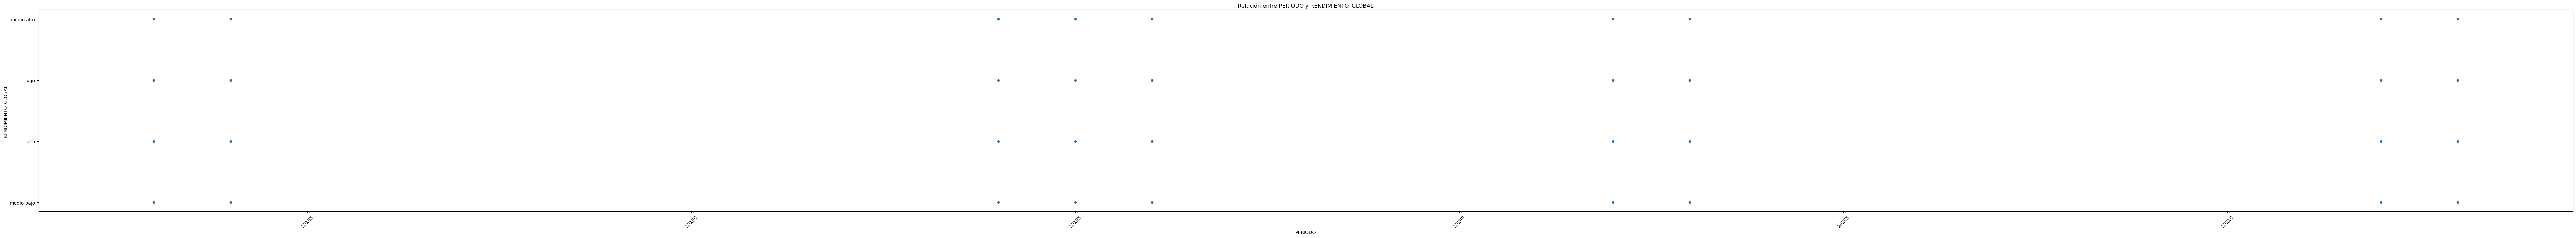

In [137]:
rendimiento_values = train_df['PERIODO'].unique()
print("Valores únicos en la columna RENDIMIENTO_GLOBAL:", rendimiento_values)

plt.figure(figsize=(100, 8))
sns.scatterplot(x='PERIODO', y='RENDIMIENTO_GLOBAL', data=train_df)
plt.title('Relación entre PERIODO y RENDIMIENTO_GLOBAL')
plt.xticks(rotation=45)
plt.show()


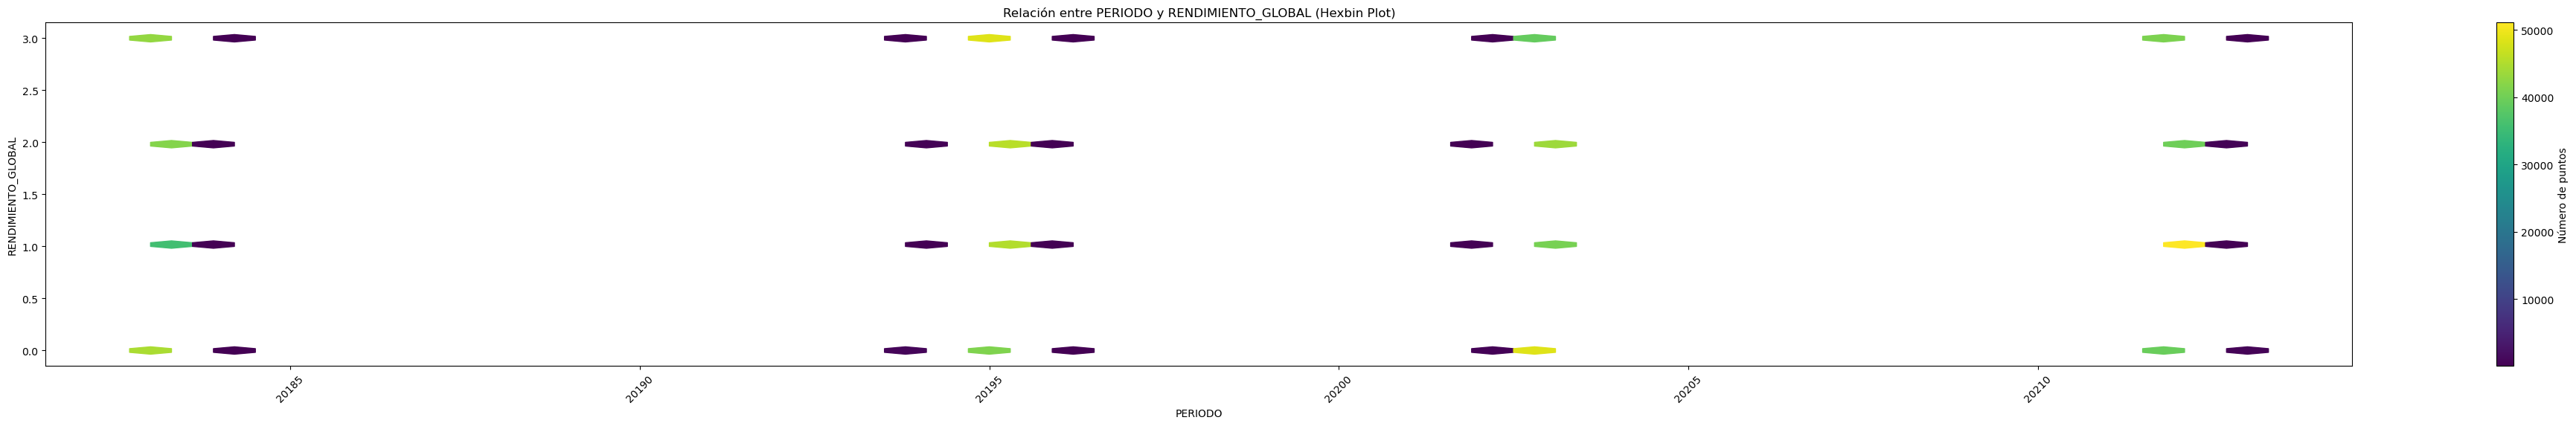

In [138]:
train_df_period_to_plot = train_df.copy()

train_df_period_to_plot['RENDIMIENTO_GLOBAL'] = train_df_period_to_plot['RENDIMIENTO_GLOBAL'].astype('category').cat.codes
plt.figure(figsize=(50, 6))
plt.hexbin(train_df_period_to_plot['PERIODO'], train_df_period_to_plot['RENDIMIENTO_GLOBAL'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Número de puntos')
plt.xlabel('PERIODO')
plt.ylabel('RENDIMIENTO_GLOBAL')
plt.title('Relación entre PERIODO y RENDIMIENTO_GLOBAL (Hexbin Plot)')
plt.xticks(rotation=45)
plt.show()

In [139]:
# Eliminar la columna ESTU_PRIVADO_LIBERTAD
train_df = train_df.drop(columns=['ESTU_PRIVADO_LIBERTAD'])
test_df = test_df.drop(columns=['ESTU_PRIVADO_LIBERTAD'])

In [140]:
print("Train:")
display(train_df.head(5))

print("\nTest:")
display(test_df.head(5))

Train:


PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0    20212                  ENFERMERIA                 BOGOTÁ   
1    20212                     DERECHO              ATLANTICO   
2    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    Técnica o tecnológica incompleta   
1            Estrato 3                 No      Técnica o tecnológica completa   
2            Estrato 3                 Si  Secundaria (Bachillerato) completa   
3            Estrato 4                 Si                             No sabe   
4            Estrato 3                 Si                   Primaria completa   

  FAMI_TIENELAVADORA FAMI_TIENEAUTOMOVIL ESTU_PAGOMATRICULAPROPIO  \
0                 Si                  Si                       No   
1                 Si                  No                       No   
2                 Si                  No                       No   
3                 Si                  No                       No   
4                 Si                  Si                       No   

  FAMI_TIENECOMPUTADOR                 FAMI_EDUCACIONMADRE RENDIMIENTO_GLOBAL  
0                   Si                           Postgrado         medio-alto  
1                   Si    Técnica o tecnológica incompleta               bajo  
2                   No  Secundaria (Bachillerato) completa               bajo  
3                   Si  Secundaria (Bachillerato) completa               alto  
4                   Si                   Primaria completa         medio-bajo


Test:


ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0  550236    20183                          TRABAJO SOCIAL   
1   98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2  499179    20212                  INGENIERIA MECATRONICA   
3  782980    20195                      CONTADURIA PUBLICA   
4  785185    20212              ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                BOLIVAR                          Menos de 500 mil   
1              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
3                  SUCRE    Entre 1 millón y menos de 2.5 millones   
4              ATLANTICO  Entre 2.5 millones y menos de 4 millones   

  ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0       Menos de 10 horas            Estrato 3                 Si   
1     Entre 21 y 30 horas            Estrato 2                 Si   
2                       0            Estrato 3                 Si   
3     Entre 21 y 30 horas            Estrato 1                 No   
4     Entre 11 y 20 horas            Estrato 2                 Si   

                    FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0        Técnica o tecnológica completa                 Si   
1    Secundaria (Bachillerato) completa                 Si   
2  Secundaria (Bachillerato) incompleta                 Si   
3                   Primaria incompleta                 Si   
4    Secundaria (Bachillerato) completa                 Si   

  FAMI_TIENEAUTOMOVIL ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                  No                       Si                   Si   
1                  No                       No                   Si   
2                  No                       No                   Si   
3                  No                       No                   No   
4                  No                       No                   Si   

                  FAMI_EDUCACIONMADRE  
0                   Primaria completa  
1      Técnica o tecnológica completa  
2  Secundaria (Bachillerato) completa  
3                 Primaria incompleta  
4  Secundaria (Bachillerato) completa

In [141]:
# Separar la columna objetivo y las características
y = train_df['RENDIMIENTO_GLOBAL']
X = train_df.drop(columns=['RENDIMIENTO_GLOBAL'])

# Verificar valores nulos en las características
print("Valores nulos en las características:")
print(X.isnull().sum())

# Verificar valores nulos en la columna objetivo
print("\nValores nulos en la columna objetivo:")
print(y.isnull().sum())

Valores nulos en las características:
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_EDUCACIONMADRE               23664
dtype: int64

Valores nulos en la columna objetivo:
0


In [142]:
# Dividir los datos en entrenamiento + validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Dividir los datos de entrenamiento + validación en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Mostrar el tamaño de cada conjunto
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (415500, 13)
Tamaño del conjunto de validación: (138500, 13)
Tamaño del conjunto de prueba: (138500, 13)


In [143]:
# Definir una función para manejar los valores nulos
def handle_missing_values(dataframe, strategy='mean'):
    if strategy == 'mean':
        # Rellenar con la media
        for column in dataframe.columns:
            if dataframe[column].dtype in ['int64', 'float64']:
                dataframe[column].fillna(dataframe[column].mean(), inplace=True)
            else:
                dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)
    elif strategy == 'median':
        # Rellenar con la mediana
        for column in dataframe.columns:
            if dataframe[column].dtype in ['int64', 'float64']:
                dataframe[column].fillna(dataframe[column].median(), inplace=True)
            else:
                dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)
    elif strategy == 'mode':
        # Rellenar con la moda
        for column in dataframe.columns:
            dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)
    elif strategy == 'drop':
        # Eliminar filas con valores nulos
        dataframe.dropna(inplace=True)
    return dataframe

In [144]:
# Manejar valores nulos en cada conjunto
X_train = handle_missing_values(X_train, strategy='mode')
X_val = handle_missing_values(X_val, strategy='mode')
X_test = handle_missing_values(X_test, strategy='mode')
X_test_final = handle_missing_values(test_df, strategy='mode')

In [145]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identificar las características categóricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Crear el transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), X.select_dtypes(include=['number']).columns.tolist())
    ],
    remainder='passthrough'
)

# Ajustar el preprocesador a los datos de entrenamiento y transformarlos
X_train_onehot = preprocessor.fit_transform(X_train)
X_val_onehot = preprocessor.transform(X_val)
X_test_onehot = preprocessor.transform(X_test)
X_test_final_onehot = preprocessor.transform(X_test_final)

# Convertir las matrices dispersas a DataFrames de pandas
X_train_onehot = pd.DataFrame(X_train_onehot.toarray(), columns=preprocessor.get_feature_names_out())
X_val_onehot = pd.DataFrame(X_val_onehot.toarray(), columns=preprocessor.get_feature_names_out())
X_test_onehot = pd.DataFrame(X_test_onehot.toarray(), columns=preprocessor.get_feature_names_out())
X_test_final_onehot = pd.DataFrame(X_test_final_onehot.toarray(), columns=preprocessor.get_feature_names_out())

# Dummy Encoding
X_train_dummy = pd.get_dummies(X_train, drop_first=True)
X_val_dummy = pd.get_dummies(X_val, drop_first=True)
X_test_dummy = pd.get_dummies(X_test, drop_first=True)
X_test_final_dummy = pd.get_dummies(X_test, drop_first=True)

In [146]:
X_train_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415500 entries, 0 to 415499
Columns: 1020 entries, cat__ESTU_PRGM_ACADEMICO_3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES to num__PERIODO
dtypes: float64(1020)
memory usage: 3.2 GB


In [147]:
def save_submission(predictions, model_name):
    # Crear la carpeta 'submissions' si no existe
    if not os.path.exists('submissions'):
        os.makedirs('submissions')

    # Crear el nombre del archivo
    date_str = datetime.now().strftime('%Y-%m-%d')
    filename = f'submission_{model_name}_{date_str}.csv'
    file_path = os.path.join('submissions', filename)

    # Crear el DataFrame para las predicciones
    submission_df = pd.DataFrame({
        'ID': X_test_final.index,  # Asegúrate de que el índice de X_test sea el ID de los estudiantes
        'RENDIMIENTO_GLOBAL': predictions
    })

    # Guardar el archivo CSV, sobrescribiendo si ya existe
    submission_df.to_csv(file_path, index=False)
    print(f'Submission saved to {file_path}')


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Definir funciones para entrenar modelos sin Grid Search
def train_random_forest(X_train, y_train, **params):
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    return model

def train_naive_bayes(X_train, y_train, **params):
    model = GaussianNB(**params)
    model.fit(X_train, y_train)
    return model

def train_xgboost(X_train, y_train, **params):
    model = xgb.XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    return model

# Definir funciones para entrenar modelos con Grid Search
def grid_search_random_forest(X_train, y_train, param_grid):
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def grid_search_naive_bayes(X_train, y_train, param_grid):
    model = GaussianNB()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def grid_search_xgboost(X_train, y_train, param_grid):
    model = xgb.XGBClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Función para seleccionar y entrenar modelos
def select_and_train_model(model_name, X_train, y_train, grid_search=False, param_grid=None, **params):
    if model_name == 'RandomForest':
        if grid_search and param_grid:
            print("Training Random Forest with Grid Search...")
            return grid_search_random_forest(X_train, y_train, param_grid)
        else:
            print("Training Random Forest without Grid Search...")
            return train_random_forest(X_train, y_train, **params)
    elif model_name == 'NaiveBayes':
        if grid_search and param_grid:
            print("Training Naive Bayes with Grid Search...")
            return grid_search_naive_bayes(X_train, y_train, param_grid)
        else:
            print("Training Naive Bayes without Grid Search...")
            return train_naive_bayes(X_train, y_train, **params)
    elif model_name == 'XGBoost':
        if grid_search and param_grid:
            print("Training XGBoost with Grid Search...")
            return grid_search_xgboost(X_train, y_train, param_grid)
        else:
            print("Training XGBoost without Grid Search...")
            return train_xgboost(X_train, y_train, **params)
    else:
        raise ValueError("Invalid model name. Choose from 'RandomForest', 'NaiveBayes', 'XGBoost'.")


In [104]:
# Definir los hiperparámetros para Grid Search
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Elegir el modelo y si se usa Grid Search
model_name = 'RandomForest'  # O 'NaiveBayes', 'XGBoost'
use_grid_search = False
params = {}  # Parametros si no se usa Grid Search

start_time = time.time()

# Entrenar el modelo
model = select_and_train_model(model_name, X_train_onehot, y_train, grid_search=use_grid_search, param_grid=param_grid_rf, **params)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed time model: {elapsed_time} seconds")

# Evaluar el modelo en el conjunto de validación
val_predictions = model.predict(X_val_onehot)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")

# Evaluar el modelo en el conjunto de test
test_predictions = model.predict(X_test_onehot)
test_accuracy = accuracy_score(y_test, val_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Hacer predicciones en el conjunto de prueba
test_predictions = model.predict(X_test_final_onehot)

# Guardar las predicciones
save_submission(test_predictions, model_name)

Training Random Forest without Grid Search...
Elapsed time model: 337.7097761631012 seconds
Validation Accuracy: 0.3938628158844765
Validation Accuracy: 0.2492129963898917


ValueError: All arrays must be of the same length